# Credit Card Fraud Detection

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Acknowledgements 

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [22]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [23]:
cd /Users/muditg19/Downloads/DOWNLOADS/ProML/Credit Card Fraud Detection

/Users/muditg19/Downloads/DOWNLOADS/ProML/Credit Card Fraud Detection


In [63]:
dataset=pd.read_csv('creditcard.csv',sep=',')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [25]:
dataset.shape

(284807, 31)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [27]:
dataset.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

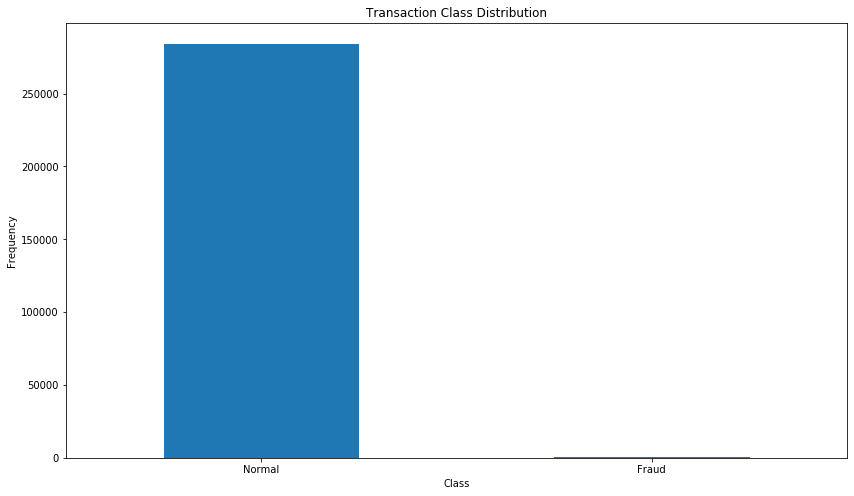

In [28]:
labels = ["Normal", "Fraud"]
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

count_classes = pd.value_counts(dataset['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), labels)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [29]:
# Fraud and Normal dataset
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [30]:
# details about fraud ammount
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
# details about normal ammount
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

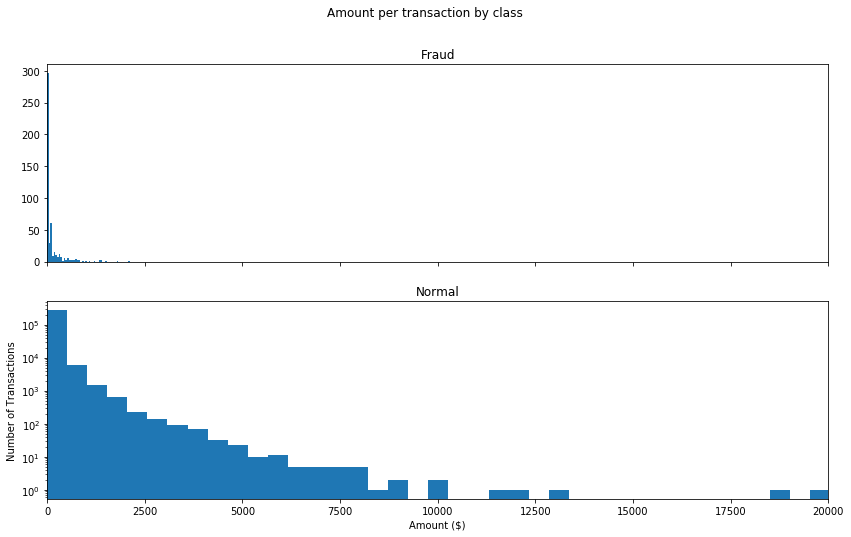

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

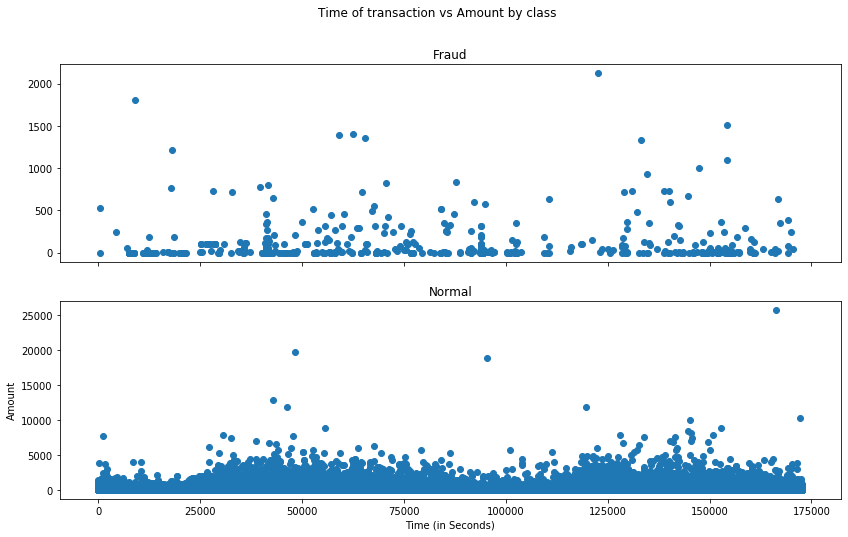

In [48]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

This dataset is very big and highly imbalanced hence we are going to under/down-sample it

In [49]:
## Take some sample of the data
data_train= dataset.sample(frac = 0.15,random_state=1)
data_test= dataset.sample(frac = 0.05,random_state=0)

In [50]:
data_train.shape

(42721, 31)

In [51]:
data_test.shape

(14240, 31)

In [52]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data_train[data_train['Class']==1]

Valid = data_train[data_train['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [53]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0016177435993622808
Fraud Cases : 69
Valid Cases : 42652


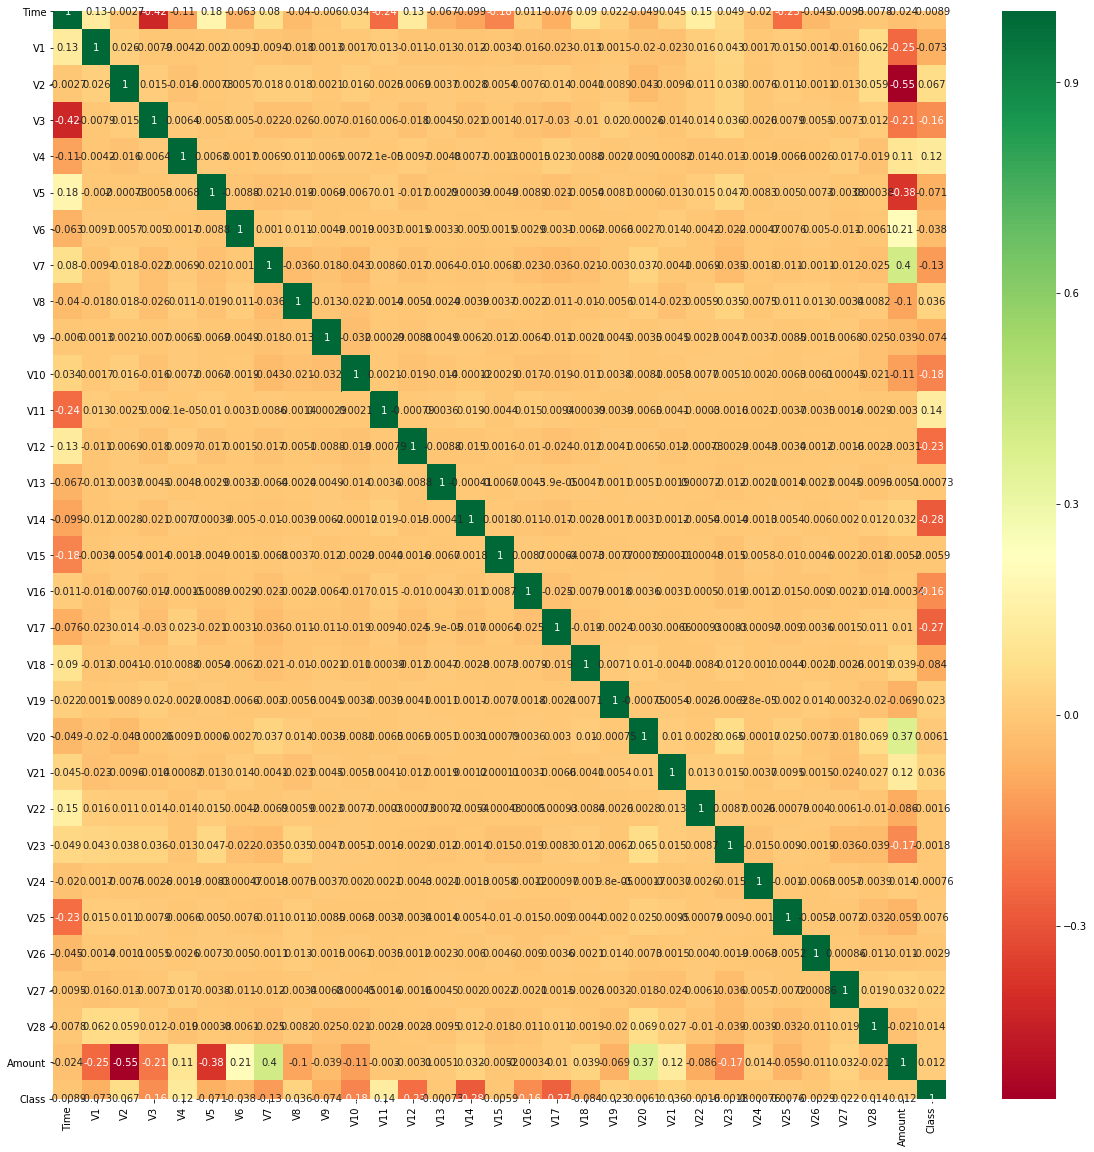

In [54]:
#get correlations of each features in dataset
corrmat = data_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
#Create independent and Dependent Features
# Filter the columns to remove data we do not want
columns = data_train.columns.tolist()[:-1]
# Define a random state 
state = np.random.RandomState(42)
X_train = data_train[columns]
y_train = data_train["Class"]
X_test = data_test[columns]
y_test = data_test["Class"]
X_outliers = state.uniform(low=0, high=1, size=(X_train.shape[0], X_train.shape[1]))
# Print the shapes of X & Y
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42721, 30)
(42721,)
(14240, 30)
(14240,)


## Model Prediction

The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

In [56]:
from sklearn import metrics

def acc_cm_cr(orig, pred, algo_name):
    pred[pred == 1] = 0
    pred[pred == -1] = 1
    n_errors = (pred != orig).sum()
    print("->Number of predictions that are not exactly equal to the original value in","{}: {}".format(algo_name,n_errors))
    accuracy = metrics.accuracy_score(orig, pred)
    print ("->Accuracy of our", algo_name, "model is : {0:.4f}".format(accuracy),'\n')
    
    print ("->Confusion Matrix\n")

    # labels for set 1=True to upper left and 0 = False to lower right
    print ("{0}".format(metrics.confusion_matrix(orig, pred, labels=[1, 0])),'\n')
    
    print ("->Classification Report\n")

    # labels for set 1=True to upper left and 0 = False to lower right
    print ("{0}".format(metrics.classification_report(orig, pred, labels=[1, 0])))

### Local Outlier Factor(LOF) Algorithm:

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [57]:
from sklearn.neighbors import LocalOutlierFactor
LOF_classifier=LocalOutlierFactor(contamination=outlier_fraction, novelty=True)
LOF_classifier.fit(X_train)

LocalOutlierFactor(algorithm='auto', contamination=0.0016177435993622808,
                   leaf_size=30, metric='minkowski', metric_params=None,
                   n_jobs=None, n_neighbors=20, novelty=True, p=2)

In [58]:
#prediction of train data
pred_train_data=LOF_classifier.predict(X_train)
acc_cm_cr(y_train, pred_train_data, "Local Outlier Factor")

->Number of predictions that are not exactly equal to the original value in Local Outlier Factor: 118
->Accuracy of our Local Outlier Factor model is : 0.9972 

->Confusion Matrix

[[    1    68]
 [   50 42602]] 

->Classification Report

              precision    recall  f1-score   support

           1       0.02      0.01      0.02        69
           0       1.00      1.00      1.00     42652

    accuracy                           1.00     42721
   macro avg       0.51      0.51      0.51     42721
weighted avg       1.00      1.00      1.00     42721



In [59]:
#prediction of test data
pred_test_data=LOF_classifier.predict(X_test)
acc_cm_cr(y_test, pred_test_data, "Local Outlier Factor")

->Number of predictions that are not exactly equal to the original value in Local Outlier Factor: 55
->Accuracy of our Local Outlier Factor model is : 0.9961 

->Confusion Matrix

[[    1    31]
 [   24 14184]] 

->Classification Report

              precision    recall  f1-score   support

           1       0.04      0.03      0.04        32
           0       1.00      1.00      1.00     14208

    accuracy                           1.00     14240
   macro avg       0.52      0.51      0.52     14240
weighted avg       1.00      1.00      1.00     14240



### Isolation Forest Algorithm :

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

In [60]:
from sklearn.ensemble import IsolationForest
IF_classifier = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=state, verbose=0)
IF_classifier.fit(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.0016177435993622808, max_features=1.0,
                max_samples=42721, n_estimators=100, n_jobs=None,
                random_state=RandomState(MT19937) at 0x1A1A2C48D0, verbose=0,
                warm_start=False)

In [61]:
# predicitng train data
pred_train_data=IF_classifier.predict(X_train)
acc_cm_cr(y_train, pred_train_data, "Isolation Forest")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


->Number of predictions that are not exactly equal to the original value in Isolation Forest: 103
->Accuracy of our Isolation Forest model is : 0.9976 

->Confusion Matrix

[[   18    51]
 [   52 42600]] 

->Classification Report

              precision    recall  f1-score   support

           1       0.26      0.26      0.26        69
           0       1.00      1.00      1.00     42652

    accuracy                           1.00     42721
   macro avg       0.63      0.63      0.63     42721
weighted avg       1.00      1.00      1.00     42721



In [62]:
# predicitng test data
pred_test_data=IF_classifier.predict(X_test)
acc_cm_cr(y_test, pred_test_data, 'Isolation Forest')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


->Number of predictions that are not exactly equal to the original value in Isolation Forest: 37
->Accuracy of our Isolation Forest model is : 0.9974 

->Confusion Matrix

[[   12    20]
 [   17 14191]] 

->Classification Report

              precision    recall  f1-score   support

           1       0.41      0.38      0.39        32
           0       1.00      1.00      1.00     14208

    accuracy                           1.00     14240
   macro avg       0.71      0.69      0.70     14240
weighted avg       1.00      1.00      1.00     14240



### Observation:

Isolation forest gave better accuracy for both test and training dataset compared to Local Outlier Factor.